In [1]:
#Import all the packages
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import math as m
import matplotlib.pyplot as plt
import matplotlib

%pylab inline 

pylab.rcParams['figure.figsize'] = (12.0, 10.0) #Set default figure size

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def lorenz(state, t0, sigma = 10, beta = 8/3, rho = 28 ):
    
    # unpack state variabls
    x = state[0]
    y = state[1]
    z = state[2]
    
    #define ode equation
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    
    return([dxdt,dydt,dzdt])

(0.0, 20.0)

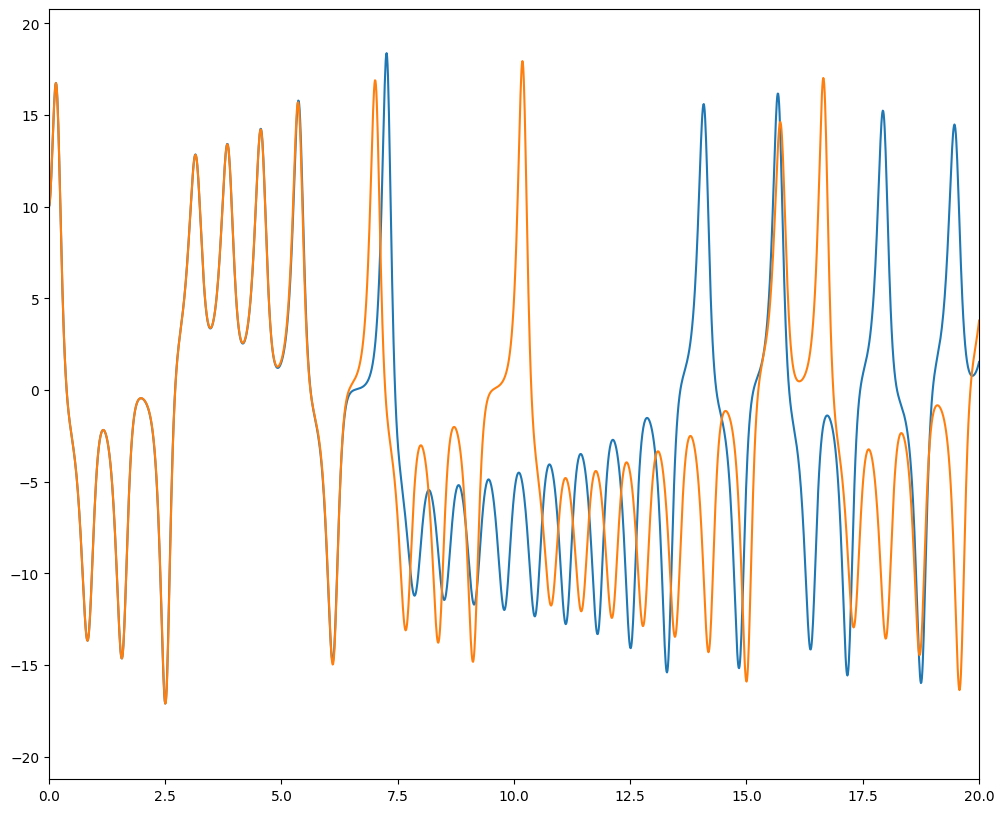

In [4]:
N_trajectories = 2
# np.random.seed(1)
state0 = 10 + 0.01*np.random.random((N_trajectories, 3))

t = np.linspace(0,100,10000)

state = np.asarray([odeint(lorenz, state0i, t)
                   for state0i in state0])

plt.plot(t,state[0,:,0])
plt.plot(t,state[1,:,0])


plt.xlim(0,20)

(0, 20)

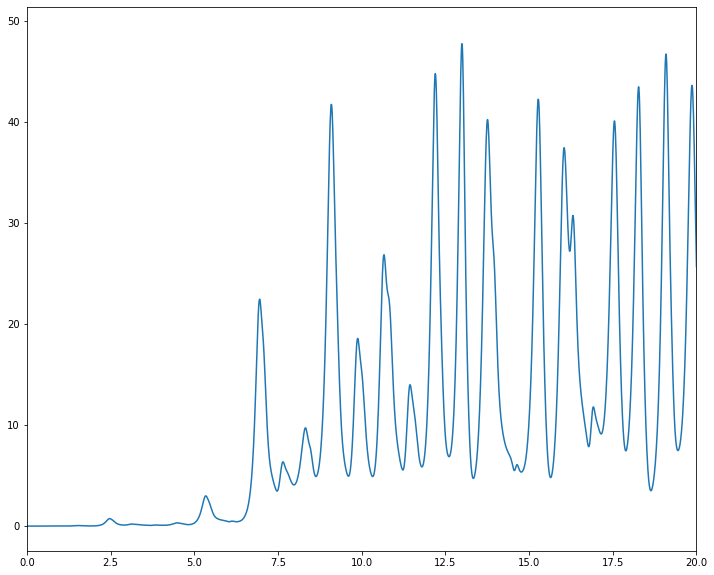

In [6]:
from scipy.spatial import distance

def compute_dst(state):
    dst = np.zeros((1, state.shape[1]))
    for i in np.arange(0,state.shape[1]):
        dst[0,i] = distance.euclidean(state[0,i,:],state[1,i,:])
 
    return(dst.T)

dst = compute_dst(state)

plt.plot(t,dst)
plt.xlim(0,20)

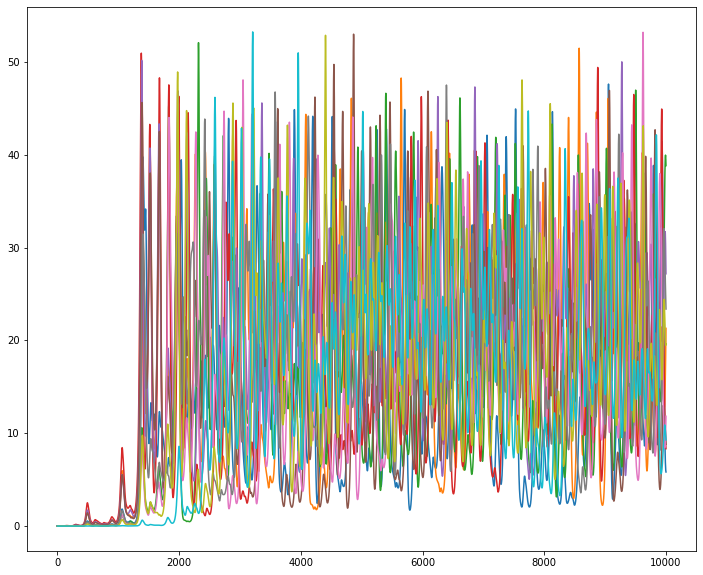

In [7]:
t = np.linspace(0,50,10000)
D = np.zeros((len(t), 10))

for i in np.arange(0,10):
    state0 = 10 + 0.01*np.random.random((N_trajectories, 3))
    state = np.asarray([odeint(lorenz, state0i, t)
                   for state0i in state0])
    
    dst = compute_dst(state)
    
    D[:,i] = dst[:,0]
    
    plt.plot(dst)

/Users/mzwilson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


(0.0004883975876021394, 150)

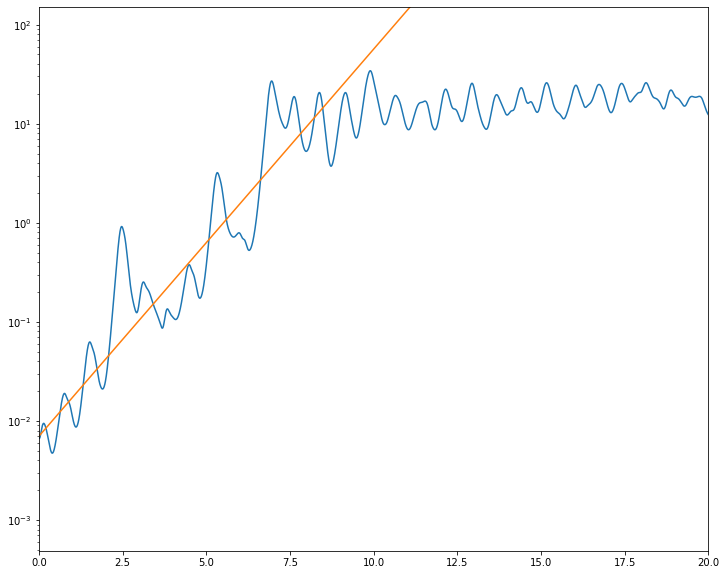

In [9]:
# Lyapunov exponent
plt.semilogy(t, np.mean(D, axis = 1))
#plt.plot(t, np.mean(D, axis = 1))
lyapunov = .9
D0 = mean(D[0,:])
plt.semilogy(t,D0*np.exp(lyapunov*t))
#plt.plot(t,D0*np.exp(lyapunov*t))
plt.xlim(0,20)
plt.ylim(0,150)

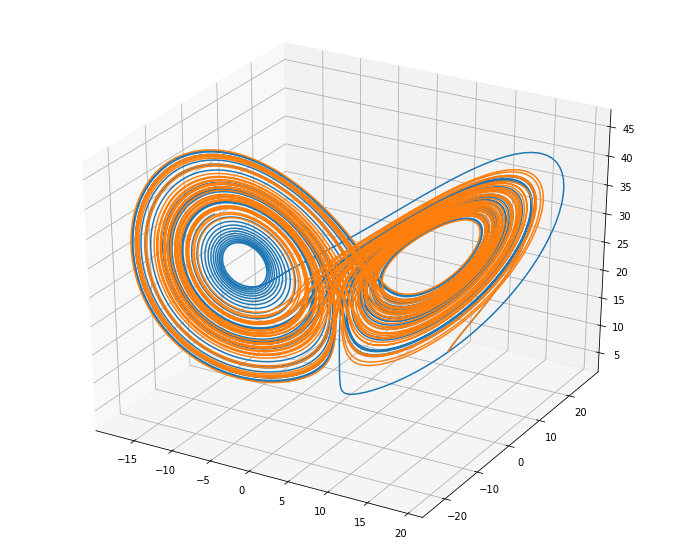

In [10]:
## Strange attractors
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig =plt.figure()
ax = fig.gca(projection = '3d')

for i in range(0,N_trajectories):
    plt.plot(state[i,:,0],state[i,:,1],state[i,:,2])

In [11]:
# An ecological model that exhibits chaos
def EcoHollingTanner(state, t0, a1=5, b1=3, a2=0.1, b2=2, d1=0.4, d2=0.01):
    
    x = state[0] #Plants
    y = state[1] #Herbivores
    z = state[2] #Carnivores
    
    #Plants
    dxdt = x*(1-x) - ((a1*x)/(1+b1*x))*y
    
    #Herbivores
    dydt = ((a1*x)/(1+b1*x))*y - d1*y - ((a2*y)/(1+b2*y))*z
    
    #Carnivores
    dzdt = ((a2*y)/(1+b2*y))*z - d2*z
    
    return [dxdt,dydt,dzdt]

    

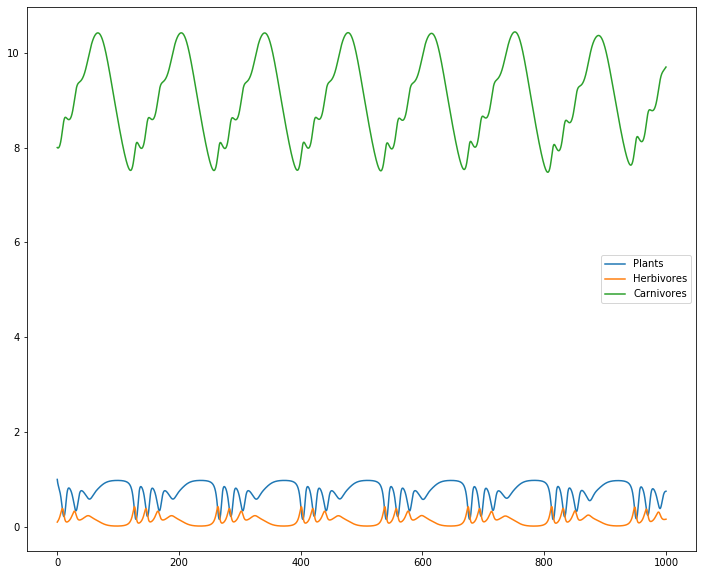

In [15]:
t = np.linspace(0,1000,10000)

state0 = np.array([1,.1,8])

state = odeint(EcoHollingTanner,state0,t)

plt.plot(t,state)
legend(('Plants','Herbivores','Carnivores'))

(0, 1000)

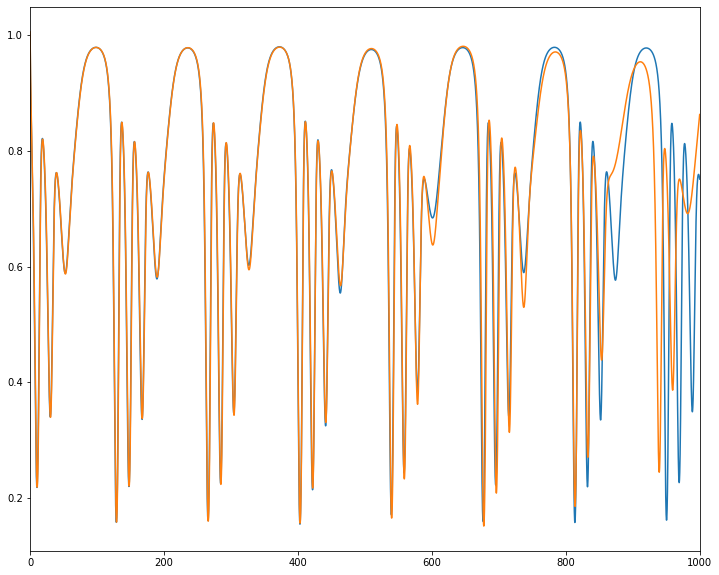

In [21]:
t = np.linspace(0,5000,100000)
x0 = np.array([1,.1,8]) + 0.01*np.random.random((N_trajectories,3))

state = np.asarray([odeint(EcoHollingTanner,x0i,t)
                   for x0i in x0])

plt.plot(t,state[0,:,0])
plt.plot(t,state[1,:,0])
plt.xlim(0,1000)

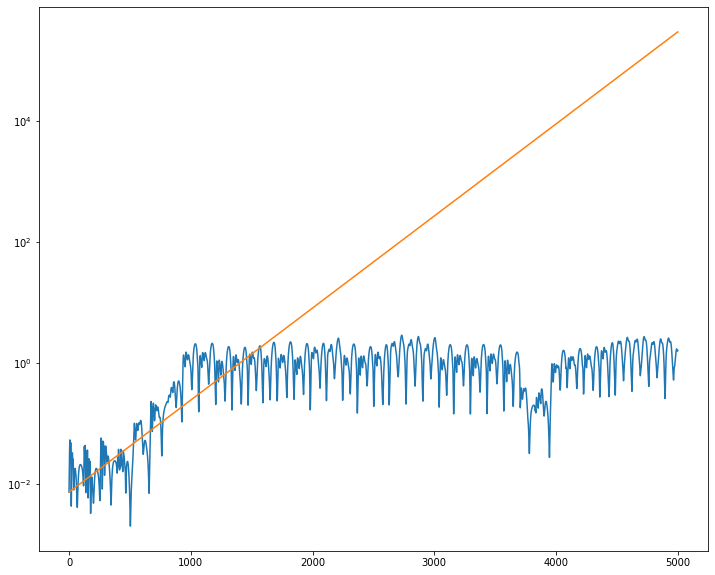

In [25]:
dst = compute_dst(state)
plt.semilogy(t,dst)

D0 = dst[0]
lyapunov = .0035
plt.semilogy(t, D0*np.exp(lyapunov*t))

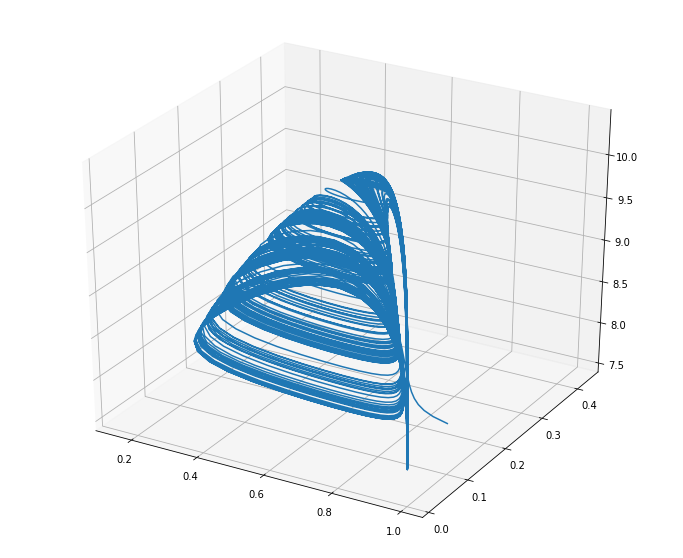

In [27]:
t = np.linspace(0,5000,10000)
state0 = np.array([1,.1,8])
state = odeint(EcoHollingTanner,state0,t)

fig =plt.figure()
ax = fig.gca(projection = '3d')

plt.plot(state[:,0],state[:,1],state[:,2])

Text(0.5, 0, 'Carnivores')

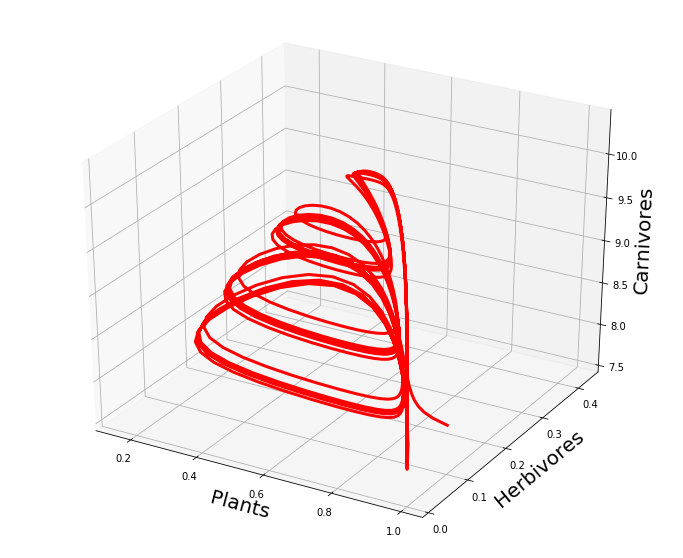

In [32]:
fig =plt.figure()
ax = fig.gca(projection = '3d')

plt.plot(state[0:2000,0],state[0:2000,1],state[0:2000,2],color = 'r',linewidth = 3)

ax.set_xlabel('Plants',fontsize=20)
ax.set_ylabel('Herbivores',fontsize=20)
ax.set_zlabel('Carnivores',fontsize=20)

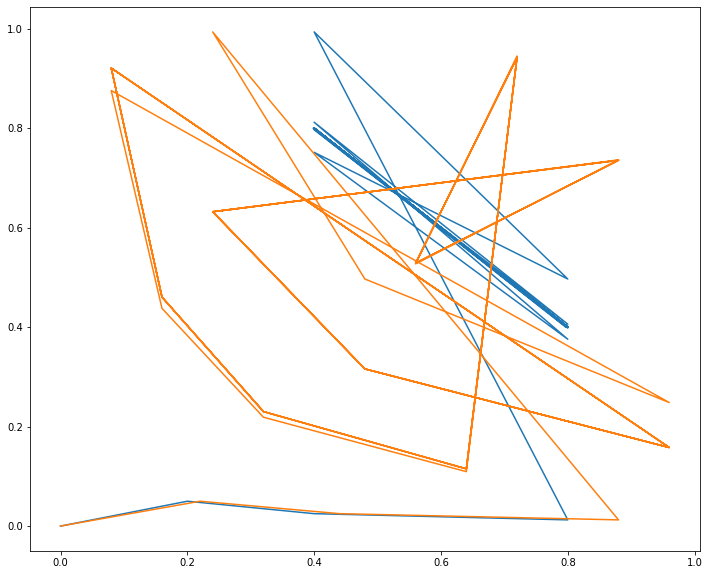

In [34]:
# Baker's Transformation

def knead(x,y):
    # Flattening
    if x < 0.5:
        x1 = 2*x
        y1 = 0.5*y
        
    # Folding
    elif x >= 0.5:
        x1 = 2-2*x
        y1 = 1-0.5*y
        
    return(x1,y1)



def recKnead(x,y,n):
    
    X = np.zeros((n))
    Y = np.zeros((n))
    
    for i in np.arange(1,n):
        x1,y1 = knead(x,y)
        X[i] = x1
        Y[i] = y1
        
        x = x1
        y = y1
        
    return(X,Y)

X,Y = recKnead(.1,.1,50)
plt.plot(X,Y)

X1,Y1 = recKnead(.11,.1,50)
plt.plot(X1,Y1)